---- Overall balances ----
D = 85.3 mol/h
W = 114.7 mol/h

---- McCabe–Thiele results ----
Steps (including reboiler) = 11.86
Theoretical trays (excluding reboiler) = 10.86
Trays above feed N_rect = 5
Feed tray from top = 6


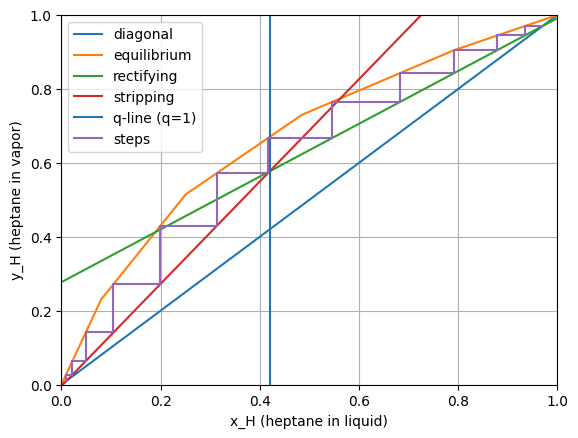

In [ ]:
# notebooks.CHE433_ModSep.Ch26_Distill.HW3.26_4_2.ipynb

import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, "..")

from bank.Distillation.distillation_mccabe_thiele_xy_base import (
    XYEquilibrium,
    McCabeThieleXYSpec,
    solve_mccabe_thiele_xy,
)

# -----------------------------
# Given
# -----------------------------
F  = 200.0
zF = 0.42
xD = 0.97
xW = 0.011
R  = 2.5
q  = 1.0  # saturated liquid feed

# Equilibrium data (heptane is "light component"):
x_eq = [0.000, 0.080, 0.250, 0.485, 0.790, 1.000]
y_eq = [0.000, 0.230, 0.514, 0.730, 0.904, 1.000]
eq = XYEquilibrium(x=x_eq, y=y_eq)

out = solve_mccabe_thiele_xy(
    McCabeThieleXYSpec(
        eq=eq,
        F=F,
        zF=zF,
        x_D=xD,
        x_W=xW,
        R=R,
        q=q,
        max_stages=1500,
    )
)

D = out["flows"]["D"]
W = out["flows"]["W"]

# N_theoretical returned here is "steps" including reboiler-equilibrium step.
N_steps_including_reboiler = out["stages"]["N_theoretical"]

# "theoretical trays" excludes reboiler (matches your stated convention)
N_trays_excluding_reboiler = N_steps_including_reboiler - 1.0

feed_tray_from_top = out["feed"]["feed_tray_from_top"]
N_rect = out["feed"]["N_rect"]

print("---- Overall balances ----")
print(f"D = {D:.1f} mol/h")
print(f"W = {W:.1f} mol/h")

print("\n---- McCabe–Thiele results ----")
print(f"Steps (including reboiler) = {N_steps_including_reboiler:.2f}")
print(f"Theoretical trays (excluding reboiler) = {N_trays_excluding_reboiler:.2f}")
print(f"Trays above feed N_rect = {N_rect:d}")
print(f"Feed tray from top = {feed_tray_from_top:d}")

# -----------------------------
# Optional plot
# -----------------------------
mR = out["lines"]["rectifying"]["slope"]
bR = out["lines"]["rectifying"]["intercept"]
mS = out["lines"]["stripping"]["slope"]
bS = out["lines"]["stripping"]["intercept"]
mq = out["lines"]["q_line"]["slope"]
bq = out["lines"]["q_line"]["intercept"]

pts = np.array(out["stages"]["points_xy"], dtype=float)
xs = np.linspace(0, 1, 500)
yeq = np.array([eq.y_of_x(float(x)) for x in xs])

plt.figure()
plt.plot(xs, xs, label="diagonal")
plt.plot(xs, yeq, label="equilibrium")
plt.plot(xs, mR * xs + bR, label="rectifying")
plt.plot(xs, mS * xs + bS, label="stripping")
if np.isfinite(mq):
    plt.plot(xs, mq * xs + bq, label="q-line")
else:
    plt.axvline(x=bq, label="q-line (q=1)")
plt.plot(pts[:, 0], pts[:, 1], linewidth=1.5, label="steps")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.xlabel("x_H (heptane in liquid)")
plt.ylabel("y_H (heptane in vapor)")
plt.legend()
plt.show()